<a href="https://colab.research.google.com/github/robertZZZZZZZZ/pytorch/blob/main/03_Computer_Vision_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision libraries
*`torchvision`	Contains datasets, model architectures and image transformations often used for computer vision problems.

*`torchvision.datasets`	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

*`torchvision.models`	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

*`torchvision.transforms`	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

*`torch.utils.data.Dataset`	Base dataset class for PyTorch.

*`torch.utils.data.DataLoader`	Creates a Python iteralbe over a dataset (created with torch.utils.data.Dataset).

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


In [3]:
# Getting a dataset

train_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16217208.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305117.92it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5582310.61it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4602915.58it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# Show first training sample
image, label = train_data[0]
image, label 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape

torch.Size([1, 28, 28])

In [9]:
class_names[label]

'Ankle boot'

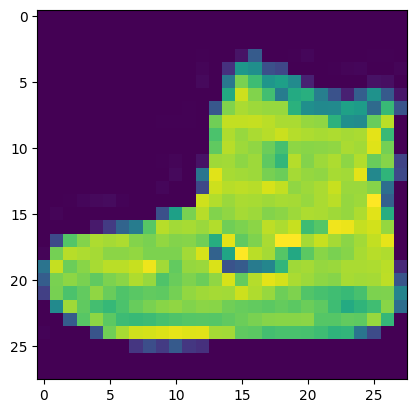

In [13]:
# Visualizing data
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze())

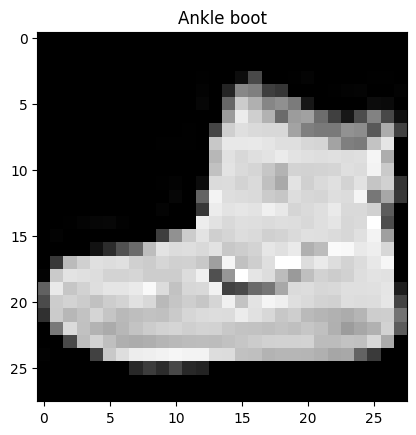

In [17]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

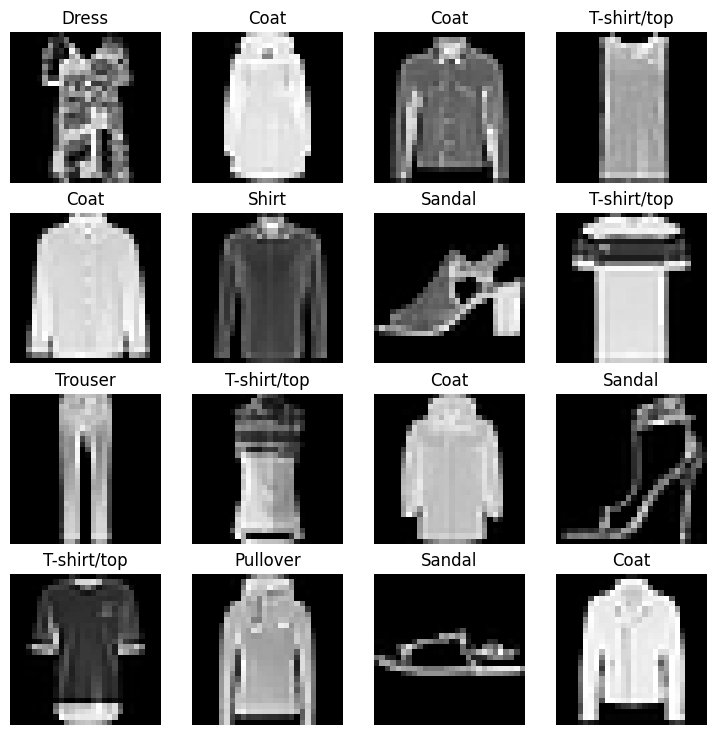

In [21]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
# Prepare Dataloader
